**Bagging & Boosting KNN & Stacking **

##Question 1 : What is the fundamental idea behind ensemble techniques? How does bagging differ from boosting in terms of approach and objective?
 - The fundamental idea behind ensemble techniques is to combine the predictions of multiple individual models, known as base learners, to create a stronger and more accurate final model.

 - This approach helps to reduce errors by minimizing variance, bias, or both, depending on the type of ensemble used.

 - Bagging (Bootstrap Aggregating) and Boosting are two popular ensemble methods, but they differ in their approach and objectives.

 - Bagging (Bootstrap Aggregating) :-

   - Objective :- Reduce variance (prevent overfitting)

   - Approach :- Trains multiple models independently on different random subsets of data (with replacement).

   - Examples :- Random Forest, Bagged Decision Trees

 - Boosting :-
  
   - Objective :- Reduce bias (improve weak learners)

   - Approach :- Trains models sequentially, each new model focuses on errors made by the previous ones.

   - Examples :- AdaBoost, Gradient Boosting, XGBoost, LightGBM

##Question 2: Explain how the Random Forest Classifier reduces overfitting compared to a single decision tree. Mention the role of two key hyperparameters in this process.

 - A single decision tree often tends to overfit the training data because it learns all the details and noise in the dataset, leading to poor generalization on unseen data.

 - In contrast, a Random Forest Classifier reduces overfitting by combining the predictions of multiple decision trees, each trained on different random subsets of data and features.

 - This ensemble approach averages out the errors and reduces variance, resulting in a more robust and stable model.

 - Two key hyperparameters play an important role in controlling overfitting in a Random Forest :-

 - n_estimators :- This specifies the number of trees in the forest. Increasing the number of trees generally improves performance and stability by averaging out more independent predictions, which reduces variance and overfitting.

 - max_features :- This determines how many features are considered for splitting at each node. By limiting the number of features, the trees become less correlated with one another, increasing diversity among trees and further reducing overfitting.

##Question 3: What is Stacking in ensemble learning? How does it differ from traditional bagging/boosting methods? Provide a simple example use case.

 - Stacking (Stacked Generalization) is an ensemble learning technique that combines the predictions of multiple different models (called base learners) using another model, known as a meta-learner or blender, to improve overall performance.

 - The idea is that different models capture different patterns in the data, and the meta-learner learns the best way to combine their outputs for final prediction.

 - In traditional bagging (like Random Forest), multiple models of the same type are trained independently on random subsets of data, and their predictions are averaged or voted upon to reduce variance.

 - In boosting (like AdaBoost or XGBoost), models are trained sequentially, where each new model focuses on correcting the mistakes of the previous ones to reduce bias.

 - However, stacking is different it trains diverse models (e.g., Decision Tree, Logistic Regression, SVM) in parallel, collects their predictions, and then uses another model (the meta-learner) to make the final decision based on those predictions.

 - Example use case :-

   - Suppose you are building a model to predict whether a customer will buy a product.

   - You can use Logistic Regression, Decision Tree, and K-Nearest Neighbors as base models.

   - Their predictions are then fed into a meta-model such as a Random Forest, which learns how to best combine those outputs for the most accurate final prediction.

##Question 4:What is the OOB Score in Random Forest, and why is it useful? How does it help in model evaluation without a separate validation set?

 - OOB (Out-of-Bag) Score is an internal validation technique used in Random Forest to evaluate model performance without needing a separate validation dataset.

 - When building each tree, the Random Forest algorithm uses bootstrap sampling — random sampling with replacement from the original dataset.

 - As a result, about one-third of the data is not used to train a given tree. These unused data points are called Out-of-Bag samples.

 - After training, each tree makes predictions on its OOB samples, and the overall accuracy of these predictions across all trees is calculated as the OOB Score.

 - The OOB Score provides an unbiased estimate of how well the model generalizes to unseen data.

 - It helps in model evaluation without creating a separate validation or test set, saving data and computation time.

##Question 5: Compare AdaBoost and Gradient Boosting in terms of:
 ● How they handle errors from weak learners
 ● Weight adjustment mechanism
 ● Typical use cases  

 - Handling Errors from Weak Learners :-

   - AdaBoost :- Focuses on misclassified samples by increasing their weights so that the next weak learner pays more attention to these difficult cases.

   - Gradient Boosting :- Focuses on the residual errors (difference between actual and predicted values) of previous models and fits the next model to minimize these residuals using gradient descent.

 - Weight Adjustment Mechanism :-

   - AdaBoost :- Assigns higher weights to misclassified data points and lower weights to correctly classified ones. Each learner gets a weight based on its accuracy, and the final prediction is a weighted sum of all learners.

   - Gradient Boosting :- Does not explicitly adjust sample weights. Instead, it optimizes a loss function by adding new models that correct the gradients (errors) of the current model’s predictions.

 - Typical Use Cases :-

    - AdaBoost :- Works well for classification tasks like spam detection, sentiment analysis, or face recognition, especially with simple base learners like decision stumps.   

    - Gradient Boosting :- Used for both regression and classification problems, and is common in applications like predictive modeling, ranking, and financial risk prediction.

##Question 6:Why does CatBoost perform well on categorical features without requiring extensive preprocessing? Briefly explain its handling of categorical variables.     

 - CatBoost performs well on categorical features because it is specifically designed to handle categorical data internally, without needing manual preprocessing like one-hot encoding or label encoding.

 - Instead of converting categories into numeric values directly, CatBoost uses a technique called “Target-Based Encoding with Ordered Statistics.”

 - This method replaces each categorical value with a numeric statistic (like the average target value) calculated in an ordered and unbiased way, preventing data leakage.

 - During training, CatBoost processes data in random permutations and uses only previous examples in that permutation to compute these statistics — ensuring that information from the current sample’s target is not used (which maintains fairness).

 - This approach allows CatBoost to capture the relationship between categorical variables and the target efficiently, while reducing overfitting and improving model performance.



In [ ]:
#Question 7: KNN Classifier Assignment: Wine Dataset Analysis with Optimization
#Task:
#1. Load the Wine dataset (sklearn.datasets.load_wine()).
#2. Split data into 70% train and 30% test.
#3. Train a KNN classifier (default K=5) without scaling and evaluate using: a. Accuracy b. Precision, Recall, F1-Score (print classification report)
#4. Apply StandardScaler, retrain KNN, and compare metrics.
#5. Use GridSearchCV to find the best K (test K=1 to 20) and distance metric (Euclidean, Manhattan).
#6. Train the optimized KNN and compare results with the unscaled/scaled versions

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

data = load_wine()
X = data.data
y = data.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

knn_default = KNeighborsClassifier(n_neighbors=5)
knn_default.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn_default.predict(X_test)

print("Without Scaling:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Without Scaling:
Accuracy: 0.7407407407407407
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        19
           1       0.75      0.71      0.73        21
           2       0.53      0.57      0.55        14

    accuracy                           0.74        54
   macro avg       0.73      0.73      0.73        54
weighted avg       0.74      0.74      0.74        54



In [ ]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_scaled = KNeighborsClassifier(n_neighbors=5)

knn_scaled.fit(X_train_scaled,y_train)

y_pred_scaled = knn_scaled.predict(X_test_scaled)
print(" With StandardScaler:")
print("Accuracy:", accuracy_score(y_test, y_pred_scaled))
print(classification_report(y_test, y_pred_scaled))

 With StandardScaler:
Accuracy: 0.9629629629629629
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       1.00      0.90      0.95        21
           2       0.93      1.00      0.97        14

    accuracy                           0.96        54
   macro avg       0.96      0.97      0.96        54
weighted avg       0.97      0.96      0.96        54



In [ ]:
param_grid = {
    'n_neighbors': list(range(1, 21)),
    'metric': ['euclidean', 'manhattan']
}

grid_search = GridSearchCV(estimator=KNeighborsClassifier(),param_grid = param_grid,cv=5,scoring='accuracy',n_jobs=-1)

grid_search.fit(X_train_scaled, y_train)

print(grid_search.best_params_)
print(grid_search.best_score_)

{'metric': 'manhattan', 'n_neighbors': 1}
0.9753333333333334


In [ ]:
best_knn = grid_search.best_estimator_
best_knn.fit(X_train_scaled, y_train)

y_pred_best = best_knn.predict(X_test_scaled)

print("Optimized KNN (after GridSearchCV):")
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))

Optimized KNN (after GridSearchCV):
Accuracy: 0.9629629629629629
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       1.00      0.90      0.95        21
           2       0.93      1.00      0.97        14

    accuracy                           0.96        54
   macro avg       0.96      0.97      0.96        54
weighted avg       0.97      0.96      0.96        54



In [ ]:
#Question 8 : PCA + KNN with Variance Analysis and Visualization
#Task:
#1. Load the Breast Cancer dataset (sklearn.datasets.load_breast_cancer()).
#2. Apply PCA and plot the scree plot (explained variance ratio).
#3. Retain 95% variance and transform the dataset.
#4. Train KNN on the original data and PCA-transformed data, then compare accuracy.
#5. Visualize the first two principal components using a scatter plot (color by class).

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np


data = load_breast_cancer()
X = data.data
y = data.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
pca.fit(X_scaled)
explained_variance = pca.explained_variance_ratio_



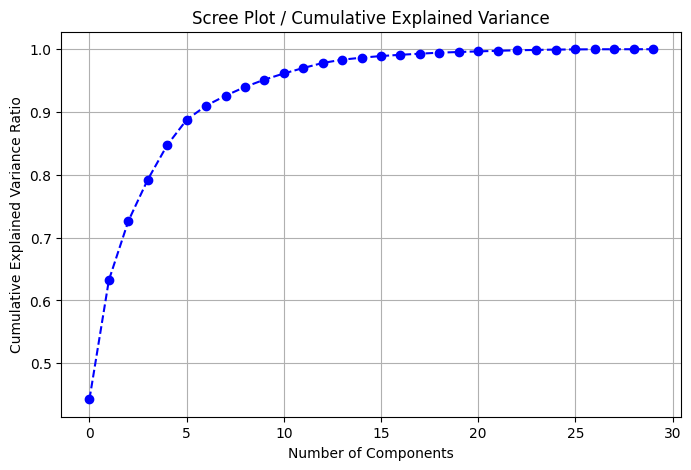

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(explained_variance), marker='o', linestyle='--', color='b')
plt.title('Scree Plot / Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid()
plt.show()

In [ ]:
pca_95 = PCA(n_components=0.95)
X_pca = pca_95.fit_transform(X_scaled)


print(f"Original shape: {X_scaled.shape}")
print(f"PCA Reduced shape (95% variance): {X_pca.shape}")

Original shape: (569, 30)
PCA Reduced shape (95% variance): (569, 10)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

knn_original = KNeighborsClassifier(n_neighbors=5)
knn_original.fit(X_train, y_train)
y_pred_original = knn_original.predict(X_test)
acc_original = accuracy_score(y_test, y_pred_original)



In [ ]:
X_train_pca, X_test_pca, _, _ = train_test_split(X_pca, y, test_size=0.3, random_state=42)
knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_train_pca, y_train)
y_pred_pca = knn_pca.predict(X_test_pca)
acc_pca = accuracy_score(y_test, y_pred_pca)


print(f"Accuracy on Original Data: {acc_original:.4f}")
print(f"Accuracy on PCA Reduced Data (95% variance): {acc_pca:.4f}")

Accuracy on Original Data: 0.9591
Accuracy on PCA Reduced Data (95% variance): 0.9649


In [ ]:
pca_2 = PCA(n_components=2)
X_pca_2 = pca_2.fit_transform(X_scaled)

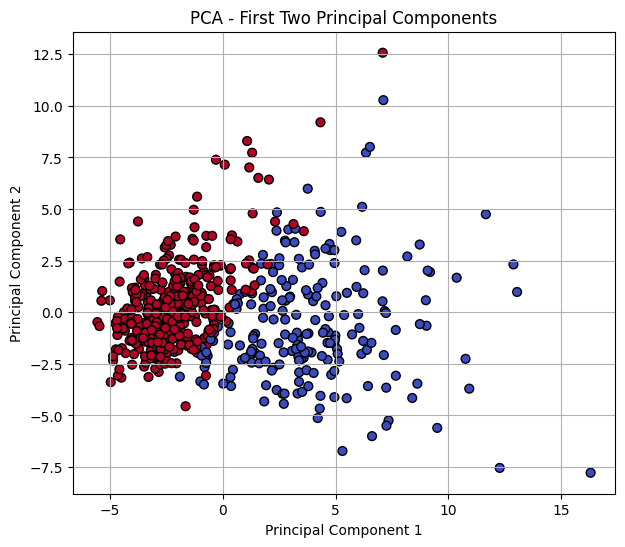

In [ ]:
plt.figure(figsize=(7,6))
plt.scatter(X_pca_2[:,0], X_pca_2[:,1], c=y, cmap='coolwarm', edgecolor='k', s=40)
plt.title('PCA - First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

In [7]:
#Question 9:KNN Regressor with Distance Metrics and K-Value Analysis
#Task:
#1. Generate a synthetic regression dataset (sklearn.datasets.make_regression(n_samples=500, n_features=10)).
#2. Train a KNN regressor with: a. Euclidean distance (K=5) b. Manhattan distance (K=5) c. Compare Mean Squared Error (MSE) for both.
#3. Test K=1, 5, 10, 20, 50 and plot K vs. MSE to analyze bias-variance tradeoff.

from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


X, y = make_regression(n_samples=500, n_features=10, noise=10, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn_euclidean = KNeighborsRegressor(n_neighbors=5, metric='euclidean')
knn_euclidean.fit(X_train, y_train)
y_pred_euclidean = knn_euclidean.predict(X_test)
mse_euclidean = mean_squared_error(y_test, y_pred_euclidean)


knn_manhattan = KNeighborsRegressor(n_neighbors=5, metric='manhattan')
knn_manhattan.fit(X_train, y_train)
y_pred_manhattan = knn_manhattan.predict(X_test)
mse_manhattan = mean_squared_error(y_test, y_pred_manhattan)

print("MSE (Euclidean, K=5):", round(mse_euclidean, 2))
print("MSE (Manhattan, K=5):", round(mse_manhattan, 2))

MSE (Euclidean, K=5): 4631.05
MSE (Manhattan, K=5): 5241.9


In [8]:
k_values = [1, 5, 10, 20, 50]
mse_values = []

for k in k_values:
  knn = KNeighborsRegressor(n_neighbors=k, metric='euclidean')
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  mse = mean_squared_error(y_test, y_pred)
  mse_values.append(mse)

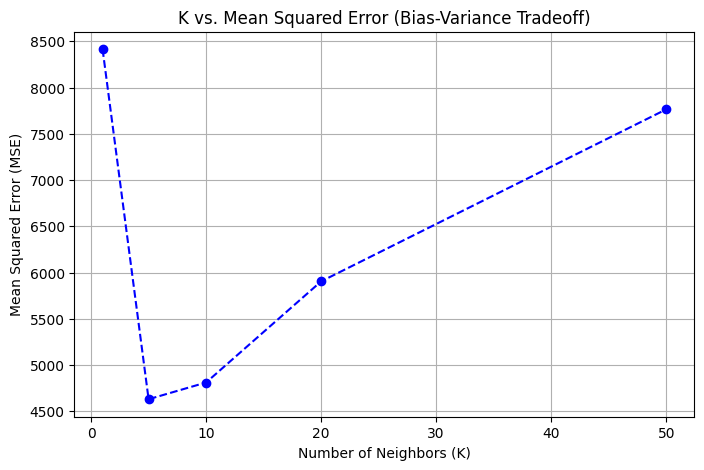

In [9]:
plt.figure(figsize=(8, 5))
plt.plot(k_values, mse_values, marker='o', linestyle='--', color='b')
plt.title("K vs. Mean Squared Error (Bias-Variance Tradeoff)")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Mean Squared Error (MSE)")
plt.grid(True)
plt.show()

BRUTE: Accuracy=0.7143, Time=0.0561s
KD_TREE: Accuracy=0.7143, Time=0.0089s
BALL_TREE: Accuracy=0.7143, Time=0.0075s


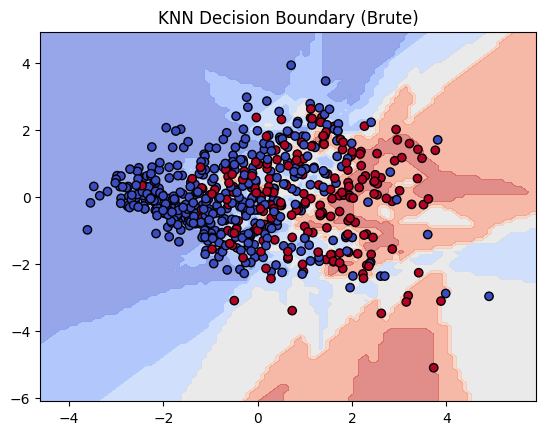

In [10]:
#Question 10: KNN with KD-Tree/Ball Tree, Imputation, and Real-World Data
#Task:
#1. Load the Pima Indians Diabetes dataset (contains missing values).
#2. Use KNN Imputation (sklearn.impute.KNNImputer) to fill missing values.
#3. Train KNN using: a. Brute-force method b. KD-Tree c. Ball Tree
#4. Compare their training time and accuracy.
#5. Plot the decision boundary for the best-performing method (use 2 most important features).

import pandas as pd, numpy as np, time, matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.inspection import DecisionBoundaryDisplay

# Load dataset
df = pd.read_csv("/content/Pima Indians Diabetes.csv")
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = \
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0, np.nan)

# Impute missing values
df = pd.DataFrame(KNNImputer(n_neighbors=5).fit_transform(df), columns=df.columns)

# Split data
X, y = StandardScaler().fit_transform(df.drop('Outcome', axis=1)), df['Outcome']
Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.2, random_state=42)

# Compare algorithms
for algo in ['brute', 'kd_tree', 'ball_tree']:
    t = time.time()
    knn = KNeighborsClassifier(n_neighbors=5, algorithm=algo).fit(Xtr, ytr)
    acc = accuracy_score(yte, knn.predict(Xte))
    print(f"{algo.upper()}: Accuracy={acc:.4f}, Time={time.time()-t:.4f}s")

# Best = brute → Decision boundary (2 PCA features)
pca = PCA(n_components=2)
Xp = pca.fit_transform(X)
Xtr_p, Xte_p, ytr_p, yte_p = train_test_split(Xp, y, test_size=0.2, random_state=42)
best = KNeighborsClassifier(n_neighbors=5, algorithm='brute').fit(Xtr_p, ytr_p)
DecisionBoundaryDisplay.from_estimator(best, Xtr_p, cmap='coolwarm', alpha=0.6)
plt.scatter(Xtr_p[:,0], Xtr_p[:,1], c=ytr_p, edgecolor='k', cmap='coolwarm')
plt.title("KNN Decision Boundary (Brute)")
plt.show()
